In [1]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

## Experiment parameters

In [2]:
# Number of time windows
T = 36

# Target 1-coverage for conformal prediction
alpha = 0.1

## Load results

In [4]:
results_file = 'results/Conformal_GNN_Flight_Results.pkl'

with open(results_file, 'rb') as file:
    results = pickle.load(file)

Save figures into a special folder.

In [5]:
save_figs = False
output_file_prefix = 'figures/Flight_'
output_file_suffix = '_10_100_50.pdf'

## Summary results

In [6]:
methods = ['BD', 'UA']
GNN_models = ['GCN', 'GAT']
regimes = ['Trans', 'Semi-Ind']
outputs = ['Accuracy', 'Avg Size', 'Coverage']

In [7]:
methods_list = []
GNN_models_list = []
regimes_list = []
outputs_list = []
stat_types_list = []
stats_list = []

for (method, GNN_model, regime, output) in product(methods, GNN_models, regimes, outputs):
    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('Mean')
    stats_list.append(np.round(np.mean(results[method][GNN_model][regime][output]['All']), 3))
    
    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('St Dev')
    stats_list.append(np.round(np.std(results[method][GNN_model][regime][output]['All']), 3))
    
df_summary = pd.DataFrame({
    'method'   : methods_list,
    'GNN model': GNN_models_list,
    'regime'   : regimes_list,
    'output'   : outputs_list,
    'statistic': stat_types_list,
    'value'    : stats_list
})

Display full table of statistics.

In [8]:
print(df_summary)

   method GNN model    regime    output statistic   value
0      BD       GCN     Trans  Accuracy      Mean   0.405
1      BD       GCN     Trans  Accuracy    St Dev   0.075
2      BD       GCN     Trans  Avg Size      Mean  24.116
3      BD       GCN     Trans  Avg Size    St Dev   2.711
4      BD       GCN     Trans  Coverage      Mean   0.900
5      BD       GCN     Trans  Coverage    St Dev   0.002
6      BD       GCN  Semi-Ind  Accuracy      Mean   0.121
7      BD       GCN  Semi-Ind  Accuracy    St Dev   0.059
8      BD       GCN  Semi-Ind  Avg Size      Mean  23.283
9      BD       GCN  Semi-Ind  Avg Size    St Dev   2.285
10     BD       GCN  Semi-Ind  Coverage      Mean   0.853
11     BD       GCN  Semi-Ind  Coverage    St Dev   0.013
12     BD       GAT     Trans  Accuracy      Mean   0.417
13     BD       GAT     Trans  Accuracy    St Dev   0.031
14     BD       GAT     Trans  Avg Size      Mean  25.173
15     BD       GAT     Trans  Avg Size    St Dev   1.631
16     BD     

## Plot results

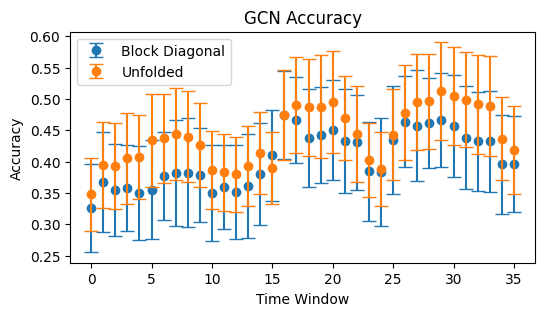

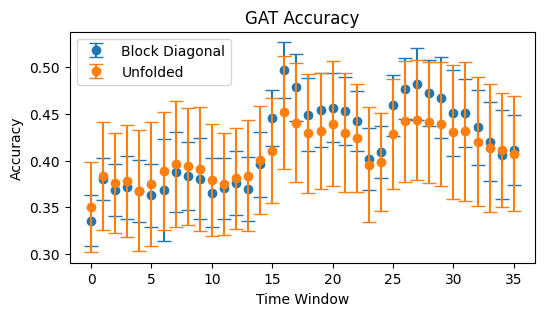

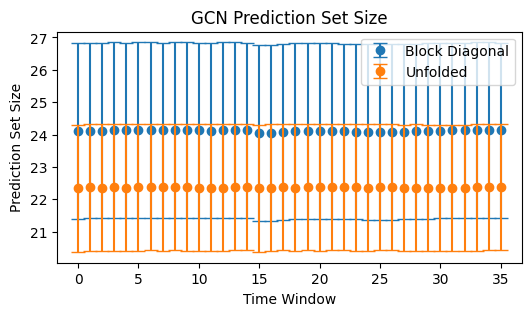

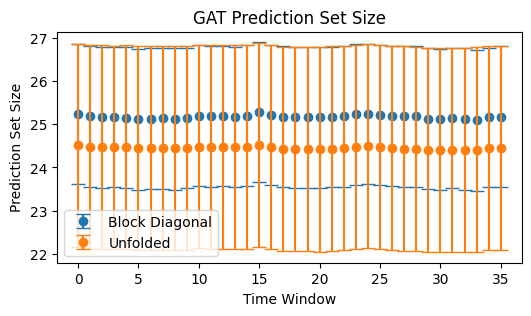

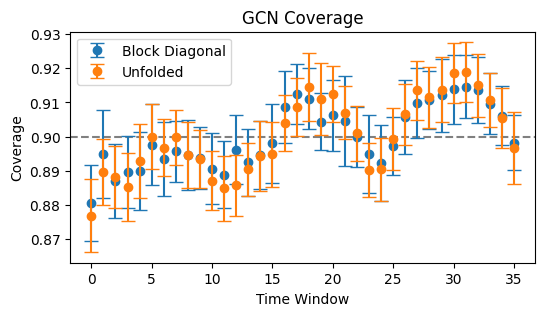

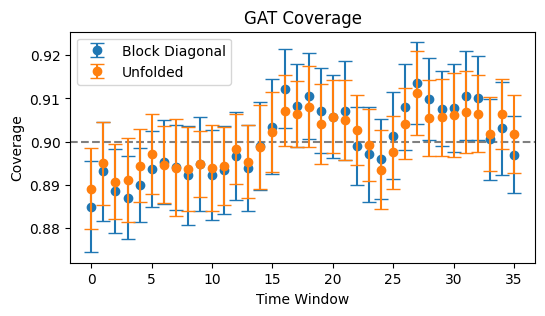

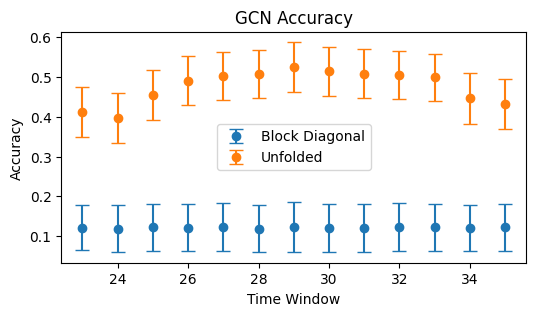

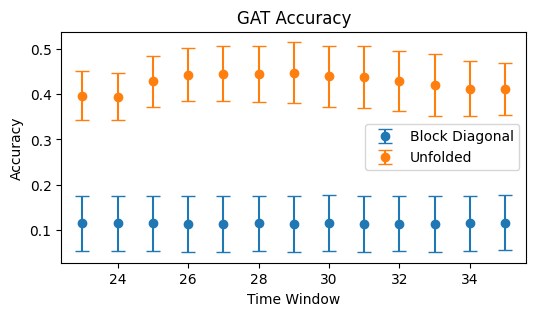

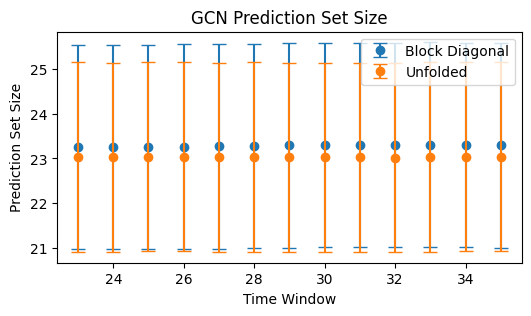

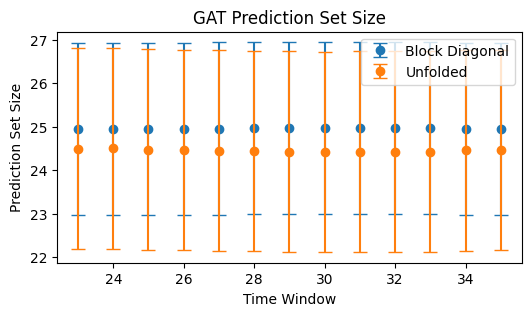

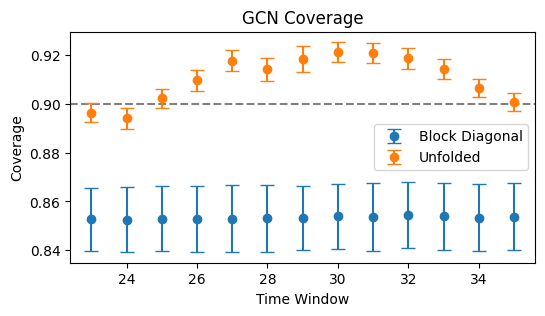

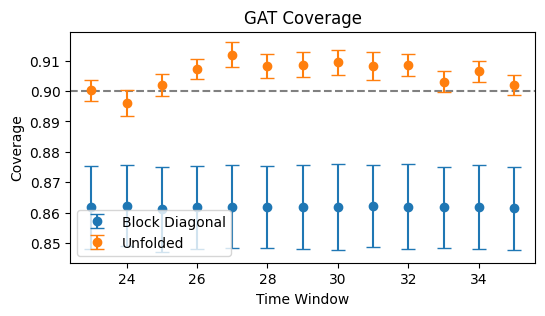

In [9]:
for (regime, output) in product(regimes, outputs):
    if output == 'Accuracy':
        output_str = 'Accuracy'
    if output == 'Avg Size':
        output_str = 'Prediction Set Size'
    if output == 'Coverage':
        output_str = 'Coverage'

    for GNN_model in GNN_models:
        fig, ax = plt.subplots(1, 1, figsize=(6.0, 3.0))
    
        T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

        output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
        output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]
        
        if output == 'Coverage':
            ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
        
        ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                    label='Block Diagonal', zorder=2)
    
        output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
        output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

        ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                    label='Unfolded', zorder=3)
    
        ax.legend()
        
        ax.set_title(GNN_model + ' ' + output_str)
        ax.set_xlabel('Time Window')
        ax.set_ylabel(output_str)
        
        if save_figs:
            fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                        bbox_inches='tight');